<a href="https://colab.research.google.com/github/Marin0306/Carpeta-de-evidencias/blob/main/Diabetes_11_JUN_2022_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red neuronal para el diagnóstico de diabetes**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Librerías**

In [2]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

**Base de datos**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
features = df.drop('Outcome', axis=1)
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
target = df['Outcome']
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Creación del conjunto de entrenamiento y validación**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1)

**Definición del modelo**

In [9]:
#Hiper parámetros a modificar para convergencia
#1 número de neuronas
#2 número de capas
#3 funciones de activación (sin modificar la última activación)
#4 Optimizador
#5 número de epocas

In [10]:
# Los parámetros que el programador modifique se llaman hyper parámetros
# Los parámetros que la computadora modifica se llaman parámetros

In [ ]:
model = Sequential()  #se crea el modelo

model.add(Dense(8, input_dim=8, activation='sigmoid'))  #capa de entrada de 8 neuronas, la primer capa oculta=8 neuronas, fnc act relu
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

print("Se ha creado una red neuronal con 5 capas (tres capas oculatas)")

**Compilación del modelo**

In [12]:
#opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False, name='SGD')
opt = 'Adam'

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

**Entrenamiento**

In [13]:
historial = model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=10,
          validation_data = [X_test, y_test],
          verbose=1)

Epoch 1/100
70/70 [==============================] - 2s 5ms/step - loss: 0.6431 - accuracy: 0.6599 - val_loss: 0.7022 - val_accuracy: 0.5714
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6599 - val_loss: 0.7016 - val_accuracy: 0.5714
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6599 - val_loss: 0.6953 - val_accuracy: 0.5714
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6599 - val_loss: 0.6975 - val_accuracy: 0.5714
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6599 - val_loss: 0.6971 - val_accuracy: 0.5714
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.6599 - val_loss: 0.6967 - val_accuracy: 0.5714
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6599 - val_loss: 0.6934 - val_accuracy: 0.5714
Epoch 8/100
7

**Curvas de entrenamiento**

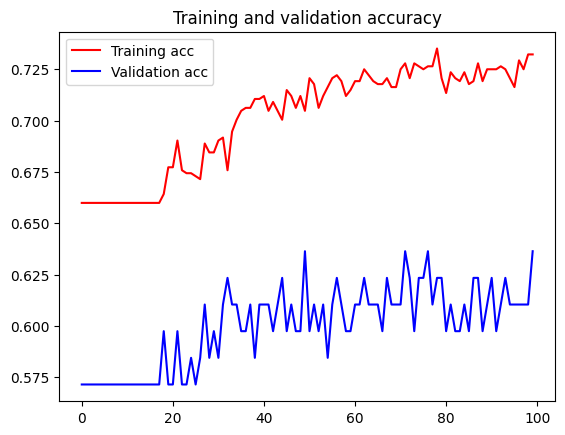

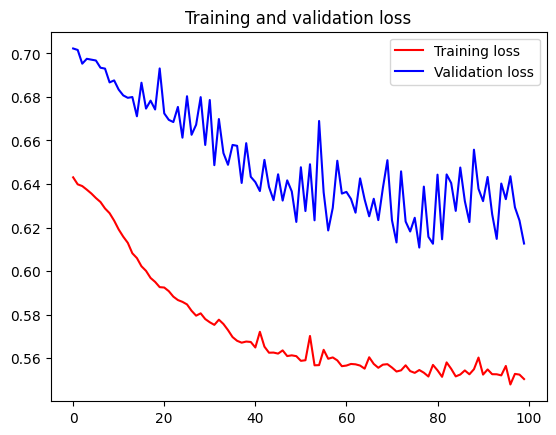

In [14]:
import matplotlib.pyplot as plt

acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']
loss = historial.history['loss']
val_loss = historial.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evaluación del modelo con el set de entrenamiento**

In [15]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

22/22 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7265
Accuracy: 72.65


**Evaluación del modelo con el set de validación**

In [16]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.6364
Accuracy: 63.64


**Predicciones con el set de validación**

In [17]:
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, rounded)
df_matriz = pd.DataFrame(matriz)
df_matriz.style.background_gradient()

3/3 [==============================] - 0s 3ms/step


,0,1
0,35,9
1,19,14


In [18]:
print(confusion_matrix(y_test, rounded))
print(classification_report(y_test, rounded))

[[35  9]
 [19 14]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.71        44
           1       0.61      0.42      0.50        33

    accuracy                           0.64        77
   macro avg       0.63      0.61      0.61        77
weighted avg       0.63      0.64      0.62        77



**Predicciones sobre una muestra de prueba**

In [29]:
#Pregnancies 	Glucose 	BloodPressure 	SkinThickness 	Insulin 	BMI 	DiabetesPedigreeFunction 	Age
X_new = [1,103,80,11,82,19.4,0.491,22]
X_new = np.expand_dims(X_new, 0)
np.shape(X_new)


prediccion = (model.predict(X_new) > 0.5).astype(int)

clase = ['No Diabetes', 'Diabetes']


print('Diagnóstico:', clase[prediccion[0][0]])

1/1 [==============================] - 0s 54ms/step
Diagnóstico: No Diabetes
